<a href="https://colab.research.google.com/github/JoSungHun/Deeplearning/blob/master/HW1_14113359_%EC%A1%B0%EC%84%B1%ED%9B%88.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

---

##hw1

#1. Calculate `np.dot(x, rotation)` and explain how this calculation is performed.
답 : [0. -2]

In [0]:
import numpy as np

x = np.array([2,0])
rotation = np.array([[0,-1],
                    [1,0]])
result = np.dot(x, rotation)
result

array([ 0, -2])

In [0]:
print(x.ndim, rotation.ndim)
print(x.shape, rotation.shape)
print(result.ndim, result.shape)

1 2
(2,) (2, 2)
1 (2,)


In [0]:
c = x@rotation
print(c)

[ 0 -2]


##explain
넘파이에서 x를 1행 2열의 배열로 인식하고, rotation을 2행 2열 배열로 인식하여 행렬곱을 수행하였다.

###numpy.dot(a,b,out=None)
 numpy.dot 은 두 배열의 내적곱(dot product).
* a, b 둘다 1-D array일 경우, 결과값은 벡터이다.
* a, b 둘다 2-D array일 경우, 행렬곱셈을 사용하지만 matmul(두 배열의 행렬곱)함수나 a@b를 수행하는것이 좋다.
* a, b 둘중 하나가 0-D(scalar)일 경우, 곱하는것과 같고, numpy.multiply(a,b) 또는 a*b를 수행하는 것이 좋다.
* a가 N-D array이고 b가 1-D array일 경우, a의 마지막 축과 b의 내적이다.
* a가 N-D array이고 b가 M-D array(M>=2)일 경우, a의 마지막 축과 b의 뒤에서 두번째 축과의 내적으로 계산된다.
https://docs.scipy.org/doc/numpy/reference/generated/numpy.dot.html 문서 참고.

#2. Suppose we have the following 2D tensor (i.e., a matrix). How to rearrange its values into 1D tensor (i.e., a vector) in a column major order?
```python
x = np.array([[1,  2,  3,  4],
                 [5,  6,  7,  8],
                 [9, 10, 11, 12]])
```
답 : 2차원 배열의 모양을 바꿔주는 reshape() 함수에 인자로 order='F'를 사용한다.

In [0]:
import numpy as np
x = np.array([[1,  2,  3,  4],
                 [5,  6,  7,  8],
                 [9, 10, 11, 12]])
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [0]:
x.shape

(3, 4)

In [0]:
a = x.reshape(12)
a

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12])

In [0]:
b = x.reshape(12,order='F')
b

array([ 1,  5,  9,  2,  6, 10,  3,  7, 11,  4,  8, 12])

## explain

https://docs.scipy.org/doc/numpy/reference/generated/numpy.reshape.html 문서를 참고.
문서에 의하면
### numpy.reshape(a,newshape,order='C')
* Parameters
  * order : {'C, 'F', 'A'} optional : 
    * 'C' : 마지막 축 지수를 가장 빠르게 변화시켜 첫 번째 축 지수로 가장 느리게 변화시키는 "C"에서 사용하는 index-order로 읽고 쓴다. (default)
    * 'F' : 첫 번째 인덱스가 가장 빠르게 변하고 마지막 인덱스가 가장 느리게 변하는 "Fortran"에서 사용하는 index-order로 읽고 쓴다.
    * 'A' : 메모리에서 a가 Fortran 연속인 경우 Fortran과 유사한 인덱스 순서로 요소를 읽고 쓰는 것을 의미하며, 그렇지 않으면 C와 같은 순서로 작성한다.
  

# 3. Compute a transpose of the matrix x in Problem 2 by using only np.reshape function.

In [0]:
import numpy as np
x = np.array([[1,  2,  3,  4],
                 [5,  6,  7,  8],
                 [9, 10, 11, 12]])
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [0]:
a = np.transpose(x)
a # 이렇게 변환하는게 목표.

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

In [0]:
x

array([[ 1,  2,  3,  4],
       [ 5,  6,  7,  8],
       [ 9, 10, 11, 12]])

In [0]:
def sunghun_transpose(matrix): # 정답코드
  temp = matrix
  temp = temp.reshape(12,order='F')
  temp = temp.reshape(4,3)
  
  return temp

In [0]:
result = sunghun_transpose(x)
result

array([[ 1,  5,  9],
       [ 2,  6, 10],
       [ 3,  7, 11],
       [ 4,  8, 12]])

## explain
1. column major order로 1D 텐서로 변환
2. 1D 텐서를 4*3 matrix로 변환


# 4. Given any random matrices, compute the element-wise multiplication using a naive Python implementation and Numpy built-in function respectively. Compare the wall-clock times of these implementations as the size of matrices increases.

In [0]:
def naive_python_element_wise_multiplication(a,b):
  assert a.shape == b.shape
  
  z = np.zeros(a.shape)
  
  for i in range(a.shape[0]):
    for j in range(b.shape[1]):
      z[i, j] = a[i, j] * b[i, j]
      
  return z
 

In [0]:
import time
import numpy as np
python_elapse = list()
numpy_elapse = list()
for i in range(2,500):
  matrixA = np.random.random((i,i))
  matrixB = np.random.random((i,i))
  
  python_start = time.time()
  result = naive_python_element_wise_multiplication(matrixA,matrixB)
  python_elapse.append(time.time() - python_start)
  
  numpy_start = time.time()
  result_matrix = matrixA * matrixB
  numpy_elapse.append(time.time() - numpy_start)
  
  print('({0},{0})행렬의 곱에 걸린 시간 \n naive_python : {1} \n numpy : {2}'.format(i,python_elapse[i-2],numpy_elapse[i-2]))

(2,2)행렬의 곱에 걸린 시간 
 naive_python : 4.1484832763671875e-05 
 numpy : 4.100799560546875e-05
(3,3)행렬의 곱에 걸린 시간 
 naive_python : 1.3589859008789062e-05 
 numpy : 3.814697265625e-06
(4,4)행렬의 곱에 걸린 시간 
 naive_python : 1.4781951904296875e-05 
 numpy : 3.0994415283203125e-06
(5,5)행렬의 곱에 걸린 시간 
 naive_python : 1.9550323486328125e-05 
 numpy : 3.0994415283203125e-06
(6,6)행렬의 곱에 걸린 시간 
 naive_python : 2.6464462280273438e-05 
 numpy : 3.814697265625e-06
(7,7)행렬의 곱에 걸린 시간 
 naive_python : 4.38690185546875e-05 
 numpy : 2.1457672119140625e-06
(8,8)행렬의 곱에 걸린 시간 
 naive_python : 4.220008850097656e-05 
 numpy : 4.5299530029296875e-06
(9,9)행렬의 곱에 걸린 시간 
 naive_python : 6.628036499023438e-05 
 numpy : 3.814697265625e-06
(10,10)행렬의 곱에 걸린 시간 
 naive_python : 5.602836608886719e-05 
 numpy : 4.0531158447265625e-06
(11,11)행렬의 곱에 걸린 시간 
 naive_python : 6.580352783203125e-05 
 numpy : 3.814697265625e-06
(12,12)행렬의 곱에 걸린 시간 
 naive_python : 0.0004184246063232422 
 numpy : 5.7220458984375e-06
(13,13)행렬의 곱에 걸린 시간 

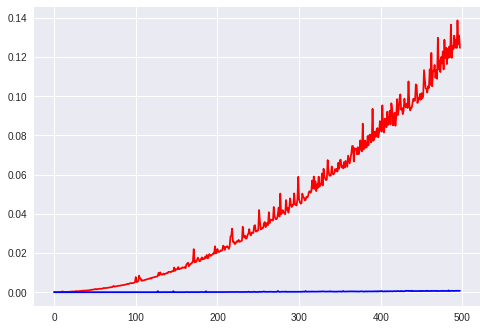

In [0]:
import matplotlib.pyplot as plt
plt.plot(python_elapse, 'r-', numpy_elapse, 'b-')

## explain

* naive_python_element_wise_multiplication(a,b) 함수를 보면 2중 for문을 통해 element-wise multiplication using a naive Python implementation을 구현 하였다.
* numpy는 *를 사용하면  built-in function을 사용할 수 있다. 

* python_elapse와 numpy_elapse 배열에 시간을 저장하고 마지막 셀에서 그래프화 하였다.
결과를 비교해 보면 행렬의 크기가 작은경우 큰차이가 없었지만 행렬의 크기가 커질수록 numpy가 월등히 성능이 좋음을 알 수 있다.
